In [61]:
#!pip install tqdm

Portugues:

- numpy: Biblioteca para manipulação de arrays e operações matemáticas.
- pandas: Biblioteca para manipulação e análise de dados em formato de tabela.
- tqdm: Fornece uma barra de progresso visual para loops.
- matplotlib.pyplot: Biblioteca para visualização de dados.
- train_test_split: Função para dividir o conjunto de dados em conjuntos de treinamento e validação.
- SVC (Support Vector Classifier): Implementação de SVM para classificação no scikit-learn.
- accuracy_score: Métrica para avaliar a acurácia do modelo.
- StandardScaler: Ferramenta para normalização dos dados.

English:

- numpy: Library for manipulating arrays and mathematical operations.
- pandas: Library for manipulating and analysing data in table format.
- tqdm: Provides a visual progress bar for loops.
- matplotlib.pyplot: Library for data visualisation.
- train_test_split: Function for splitting the data set into training and validation sets.
- SVC (Support Vector Classifier): SVM implementation for classification in scikit-learn.
- accuracy_score: Metric for evaluating the model's accuracy.
- StandardScaler: Tool for normalising data.

In [62]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

1-Esta parte do código lida com a leitura dos conjuntos de treinamento e teste a partir dos arquivos CSV fornecidos.

1-This part of the code deals with reading the training and test sets from the CSV files provided.

In [63]:
# 1. Leitura e Exploração dos Dados
# 1 Reading and Exploring the Data

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

2-Esta parte exibe aleatoriamente uma imagem do conjunto de treinamento, visualizando o dígito manuscrito, e imprime o rótulo associado ao dígito.

2-This part randomly displays an image of the training set, visualising the handwritten digit, and prints the label associated with the digit.

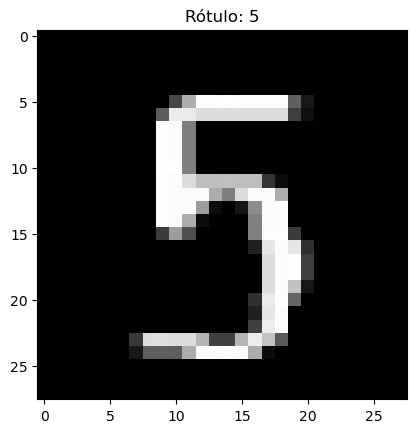

Número exibido na imagem: 5


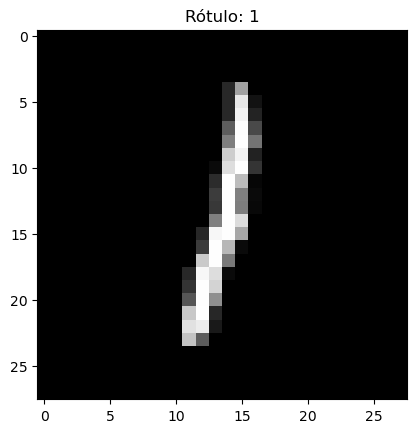

Número exibido na imagem: 1


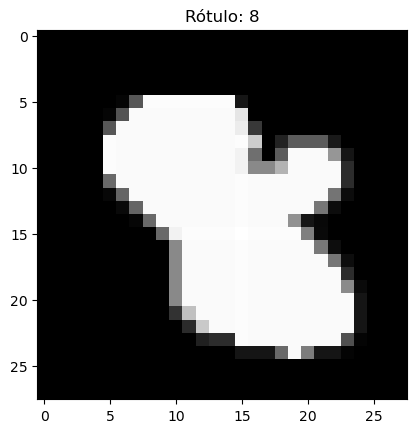

Número exibido na imagem: 8


In [64]:
# 2. Visualização dos Dados
# (Visualização de algumas imagens, verificação da distribuição dos rótulos)

# 2. data visualisation
# (Visualisation of some images, checking the distribution of labels)

# Escolha aleatória de uma imagem do conjunto de treinamento
# Random selection of an image from the training set
for _ in range(3):
    random_index = np.random.randint(0, len(train_data))
    random_image = train_data.iloc[random_index, 1:].values.reshape(28, 28)
    label = train_data.iloc[random_index, 0]

# Visualização da imagem
    # Image visualization
    plt.imshow(random_image, cmap='gray')
    plt.title(f'Rótulo: {label}')
    plt.show()
    # Impressão do número abaixo da imagem
    # Print the number below the image
    print(f'Número exibido na imagem: {label}')

3-
- X contém os dados de treinamento, excluindo a coluna de rótulos.
- y contém os rótulos correspondentes.
- Normalização dos valores dos pixels para o intervalo [0, 1].

3-
- X contains the training data, excluding the labels column.
- y contains the corresponding labels.
- Normalisation of the pixel values to the interval [0, 1].

In [65]:
# 3. Pré-Processamento dos Dados
#3 Data pre-processing

X = train_data.drop('label', axis=1)
y = train_data['label']
X = X / 255.0  # Normalização

4-Define o tamanho do pedaço (chunk_size) e inicializa o modelo SVM.
Usa um loop para treinar o modelo em pedaços do conjunto de treinamento, atualizando a barra de progresso.

4-Sets the chunk size and initialises the SVM model.
Uses a loop to train the model on chunks from the training set, updating the progress bar.

In [66]:
# 4. Treinamento do Modelo em Pedaços
# 4 Model Training in Chunks

#  tamanho do pedaço / chunk size
chunk_size = 5000

# Inicialize o modelo SVM / Initialise the SVM model
svm_model = SVC(kernel='linear', C=10, gamma='auto')


# tqdm para criar uma barra de progresso / tqdm to create a progress bar
with tqdm(total=len(X), desc="Treinamento do Modelo", unit="samples", ncols=80) as pbar:
    for i in range(0, len(X), chunk_size):
        # Divida o conjunto de treinamento em pedaços de 5000 amostras
        X_chunk = X.iloc[i:i + chunk_size]
        y_chunk = y.iloc[i:i + chunk_size]

        # Pré-processamento / Pre-processing
        scaler = StandardScaler()
        X_chunk_scaled = scaler.fit_transform(X_chunk)

        # Treinamento do modelo no pedaço atual
        # Model training on the current piece
        svm_model.fit(X_chunk_scaled, y_chunk)

        # Atualização da barra de progresso
        # Progress bar update
        pbar.update(chunk_size)

Treinamento do Modelo: 45000samples [00:07, 6038.69samples/s]                   


5-avalia a acurácia do modelo

5-evaluates the model's accuracy

In [67]:
# 5. Avaliação do Modelo
# 5. Model evaluation
X_val_scaled = scaler.transform(X_val)
y_pred = svm_model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)

# Convertendo para percentual
accuracy_percent = accuracy * 100

print(f'Acurácia do modelo: {accuracy_percent:.2f}%. \nModel accuracy: {accuracy_percent:.2f}%')


Acurácia do modelo: 89.77%. 
Model accuracy: 89.77%


6- Normaliza os dados de teste, faz previsões usando o modelo treinado

6- Normalises test data, makes predictions using the trained model

In [68]:
# 6. Previsões no Conjunto de Teste
# 6. Predictions in the Test Set
X_test = test_data / 255.0  # Normalização
X_test_scaled = scaler.transform(X_test)
test_predictions = svm_model.predict(X_test_scaled)

7-Por fim, as previsões no conjunto de teste são organizadas em um DataFrame e salvas em um arquivo CSV chamado submission.csv.

7-Finally, the predictions in the test set are organised in a DataFrame and saved in a CSV file called submission.csv.

In [69]:
# 7. Criação do Arquivo de Envio
# 7. Creating the Send File
submission_df = pd.DataFrame({'ImageId': range(1, len(test_predictions) + 1), 'Label': test_predictions})
submission_df.to_csv('submission.csv', index=False)
print('O arquivo CSV foi gerado com sucesso.\nThe CSV file has been successfully generated.')

O arquivo CSV foi gerado com sucesso.
The CSV file has been successfully generated.
